### SIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

$$
\frac{dS}{dt}= -\beta I S \\
\frac{dI}{dt}= \beta I S -\gamma I=(\beta S - \gamma) I\\
\frac{dR}{dt}= \gamma I \\
$$

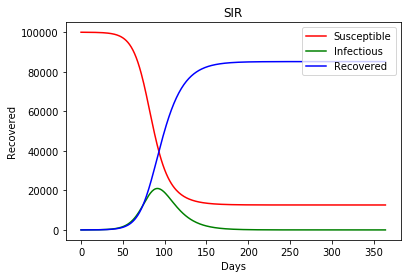

In [1]:
#get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SIR(s,i,r,Ro,Tr,a,b):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    a = 0.0         # Start of the interval in days
    b = 365.0      # End of the interval in days
    T = (b-a)     # Number of steps
    h = (b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]

#important part
Ro = 2.4
Tr = 12.9
start = 0.
end = 100.

s = 99990.0  # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SIR")
plt.xlabel("Days")
plt.savefig('SEIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SIR xy.png', dpi = 300)
#plt.show()


### SEIR Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

$$
\frac{dS}{dt}= -\alpha I S \\
\frac{dE}{dt}= \beta I S -\alpha E\\
\frac{dI}{dt}= \alpha E -\gamma I\\
\frac{dR}{dt}= \gamma I \\
$$

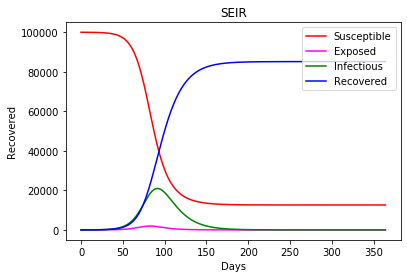

In [2]:
#get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SEIR(s,e,i,r,Ro,Tr,Ta,a,b):

    def s_prime(x):
        return  -beta*i*s
    def e_prime(x):
        return  beta*i*s-alpha*e
    def i_prime(x):
        return  alpha*e-gamma*i
    def r_prime(x):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    T = (b-a)      # Number of steps
    h = (b-a)/T    # Size of a single step

    N = s+e+i+r    # Initial population
    alpha = 1/Ta
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        epoints.append(e)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        e += h*e_prime(e)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,epoints,ipoints,rpoints]

#important part
Ro = 2.4
Tr = 12.9
Ta = 1.

start = 0.
end = 365.

s = 99990.0  # Initial condition
e = 0.0        # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,epoints,ipoints,rpoints]=SEIR(s,e,i,r,Ro,Tr,Ta,start,end)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,epoints, color = 'green' , label='Exposed')
plt.plot(tpoints,epoints, color = 'magenta' , label='Exposed')
plt.ylabel("Exposed")
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SEIR")
plt.xlabel("Days")
plt.savefig('SEIR Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SEIR xy.png', dpi = 300)
#plt.show()

### SEIRD Model
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model

$$
\frac{dS}{dt}= -\alpha I S \\
\frac{dE}{dt}= \beta I S -\alpha E\\
\frac{dI}{dt}= \alpha E -(\gamma+\delta) I\\
\frac{dR}{dt}= \gamma I \\
\frac{dD}{dt}= \delta I \\
$$

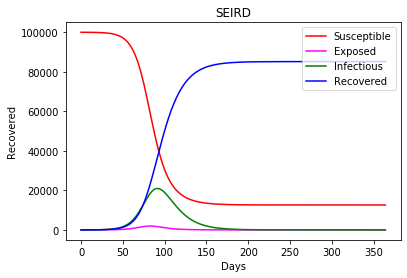

In [3]:
#get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SEIR(s,e,i,r,Ro,Tr,Ta,a,b):

    def s_prime(x):
        return  -beta*i*s
    def e_prime(x):
        return  beta*i*s-alpha*e
    def i_prime(x):
        return  alpha*e-gamma*i
    def r_prime(x):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    T = (b-a)      # Number of steps
    h = (b-a)/T    # Size of a single step

    N = s+e+i+r    # Initial population
    alpha = 1/Ta
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    epoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        epoints.append(e)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        e += h*e_prime(e)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,epoints,ipoints,rpoints]

#important part
Ro = 2.4
Tr = 12.9
Ta = 1.

start = 0.
end = 365.

s = 99990.0  # Initial condition
e = 0.0        # Initial condition
i = 10.0     # Initial condition
r = 0.0      # Initial condition

[tpoints,spoints,epoints,ipoints,rpoints]=SEIR(s,e,i,r,Ro,Tr,Ta,start,end)

plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
plt.legend(loc='upper right')
plt.ylabel("Susceptible")
#plt.twinx()
#plt.semilogy(tpoints,epoints, color = 'green' , label='Exposed')
plt.plot(tpoints,epoints, color = 'magenta' , label='Exposed')
plt.ylabel("Exposed")
plt.plot(tpoints,ipoints, color = 'green' , label='Infectious')
plt.ylabel("Infectious")
plt.legend(loc='upper right')
plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
plt.ylabel("Recovered")
plt.legend(loc='upper right')

plt.title("SEIRD")
plt.xlabel("Days")
plt.savefig('SEIRD Model.png', dpi = 300)
plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SEIR xy.png', dpi = 300)
#plt.show()

### Q? How does Mitigation (like Social Distancing, School Closer and Total Shutdown) effect the solution to the SIR Model?
### A. ${\beta}$
https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics

$$
\frac{dS}{dt}= -\beta I S  \\
\frac{dI}{dt}= \beta I S -\gamma I=(\beta S - \gamma) I\\
\frac{dR}{dt}= \gamma I \\
$$

### Parameters of the model
$$
\beta=\frac{R_0}{N T_r}=\frac{2.3 ~\mathrm people}{12.9 ~\mathrm days}\approx 0.18 ~\mathrm{ person/day ~( ~or ~5.5 ~days/person ~)}\\
\gamma=\frac{1}{T_r}=\frac{1}{12.9  ~\mathrm days}\approx 0.08 ~\mathrm{ / day}\\
$$


### Flattening the curve

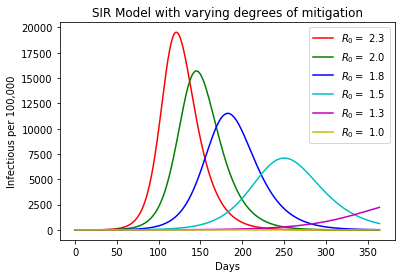

,$R_0$,$T_r$,$\frac{T_r}{R_0}$
no mitigation,2.3,12.9,5.6
school closure,2.0,12.9,6.3
social distancing,1.8,12.9,7.2
shelter in place,1.5,12.9,8.3
school closure+social distancing,1.3,12.9,9.9
school closure+shelter in place,1.0,12.9,12.3


In [4]:
#get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SIR(s,i,r,Ro,Tr,a,b):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    a = 0.0         # Start of the interval in days
    b = 365.0      # End of the interval in days
    T = (b-a)     # Number of steps
    h = (b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]

#important part
Ro = 2.3
Tr = 12.9
start = 0.
end = 365.

#s = 1.754e6  # Initial condition
i = 1.0     # Initial condition
s = 1.e5-i  # Initial condition
r = 0.0      # Initial condition
N = s+i+r

#print(r'$R_0 \beta \gamma$')
import pandas as pd
num=6
Ros = np.arange(2.3,1.,-1.5/num)
Trs = np.full(shape=len(Ros),fill_value=Tr)

pd.options.display.float_format = '{:.1f}'.format              
plt.gca().set_prop_cycle(color=['r','g','b','c','m','y','k'])
data = []

for Ro in Ros:
    [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)
    data = {r'$R_0$':Ros,
        r'$T_r$':Trs,
        r'$\frac{T_r}{R_0}$':Trs/Ros}

    #plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
    #plt.legend(loc='upper right')
    #plt.ylabel("Susceptible")
    #plt.twinx()
    #plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
    plt.plot(tpoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
    plt.ylabel("Infectious per 100,000")
    plt.legend(loc='best')
    #plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
    #plt.ylabel("Recovered")
    #plt.legend(loc='upper right')
    
plt.title("SIR Model with varying degrees of mitigation")
plt.xlabel("Days")
plt.savefig('SIR Model Series.png', dpi = 300)
plt.show()

df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','shelter in place','school closure+social distancing','school closure+shelter in place'])
#df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','lock down'])
#print(data)
df

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
#plt.savefig('SIR xy.png', dpi = 300)
#plt.show()

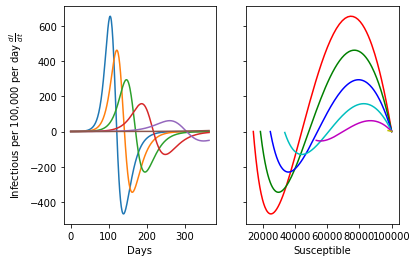

,$R_0$,$T_r$,$\frac{T_r}{R_0}$
no mitigation,2.3,12.9,5.6
school closure,2.1,12.9,6.2
social distancing,1.9,12.9,6.9
shelter in place,1.6,12.9,7.8
school closure+social distancing,1.4,12.9,9.0
school closure+shelter in place,1.2,12.9,10.6


In [5]:
#get_ipython().magic('matplotlib inline')
import numpy as np
import matplotlib.pyplot as plt

def SIR(s,i,r,Ro,Tr,a,b):

    def s_prime(s):
        return  -beta*i*s
    def i_prime(i):
        return  beta*i*s-gamma*i
    def r_prime(r):
        return  gamma*i

    #def f(x,t):
    #    return -x**3 + np.sin(t)

    a = 0.0         # Start of the interval in days
    b = 365.0      # End of the interval in days
    T = (b-a)     # Number of steps
    h = (b-a)/T        # Size of a single step

    N = s+i+r
    beta = Ro/Tr/N   #COVID-19,14days,100k
    gamma = 1/Tr      #

    #create the array of time values and (empty) x-values, and loop over 
    #all times supplementing x each time
    tpoints = np.arange(a,b,h)
    spoints = []
    ipoints = []
    rpoints = []

    for t in tpoints:
        spoints.append(s)
        ipoints.append(i)
        rpoints.append(r)
        s += h*s_prime(s)
        i += h*i_prime(i)
        r += h*r_prime(r)

    return [tpoints,spoints,ipoints,rpoints]

#important part
Ro = 5.1
Tr = 12.9
start = 0.
end = 365.

#s = 1.754e6  # Initial condition
s = 1.e5  # Initial condition
i = 1.0     # Initial condition
r = 0.0      # Initial condition

#print(r'$R_0 \beta \gamma$')
import pandas as pd
num=6
#Ros = np.arange(Ro,1.,(1.-Ro)/num)
Ros = np.arange(2.3,1.,-1.3/num)
Trs = np.full(shape=len(Ros),fill_value=Tr)

pd.options.display.float_format = '{:.1f}'.format

data = []
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

plt.gca().set_prop_cycle(color=['r','g','b','c','m','y','k'])
for Ro in Ros:
    [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)
    data = {r'$R_0$':Ros,
        r'$T_r$':Trs,
        r'$\frac{T_r}{R_0}$':Trs/Ros}

    #plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
    #plt.legend(loc='upper right')
    #plt.ylabel("Susceptible")
    #plt.twinx()
    #plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
    ax1.plot(tpoints,np.gradient(ipoints), label='Infectious')
    ax1.set_xlabel("Days")
    ax1.set_ylabel(r"Infectious per 100,000 per day $\frac{dI}{dt}$")
    ax2.plot(spoints,np.gradient(ipoints), label='Infectious')
    ax2.set_xlabel("Susceptible")
    #plt.legend(loc='upper right')
    #plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
    #plt.ylabel("Recovered")
    #plt.legend(loc='upper right')
    

#plt.title("SIR")
#plt.xlabel("Days")
#plt.savefig('SIR Model.png', dpi = 300)
#plt.show()

#plt.plot(spoints,ipoints, color = 'red' , label='Predator')
#plt.xlabel("Susceptible")
#plt.ylabel("Infectious")
plt.savefig('SIR dI.png', dpi = 300)
plt.show()

df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','shelter in place','school closure+social distancing','school closure+shelter in place'])
#df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','lock down'])
df



# The Timing of the COVID-19 Peak in the SIR Model
Matthew L Ferguson,
Associate Professor of Physics, 
Boise State University

with

Bruce N Miller,
Emeritus Professor of Physics, 
Texas Christian University

March 26, 2020

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#Exact_analytical_solutions_to_the_SIR_model
Following notation from the above linked page.

At the peak:
$ \frac{dI}{dt}=\left(R_0 \frac{S}{N}-1\right)\gamma I=0$
therefore
$S_{max}=\frac{N}{R_0}$
is the value of $S$ at maximum.

Following the analytical solution of Harko et al.(2014)

$t_{max}=\int_{u_{max}}^1\frac{N}{\gamma R_0 s \left(N-R(0)+\frac{N}{R_0} ln(s) - S(0) s\right)}ds$ where $u_{max}=\frac{S_{max}}{S(0)}=\frac{N}{R_0 S(0)}$

$I_{max}=I(0)+S(0)-\frac{1+log(R_0 S(0))}{R_0}$

 Harko, Tiberiu; Lobo, Francisco S. N.; Mak, M. K. (2014). "Exact analytical solutions of the Susceptible-Infected-Recovered (SIR) epidemic model and of the SIR model with equal death and birth rates". Applied Mathematics and Computation. 236: 184–194. arXiv:1403.2160. Bibcode:2014arXiv1403.2160H. doi:10.1016/j.amc.2014.03.030.

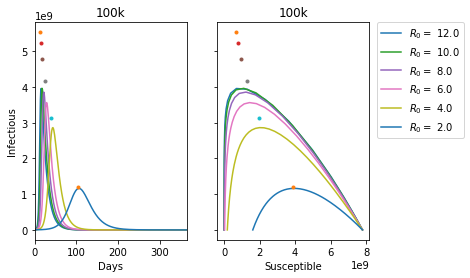

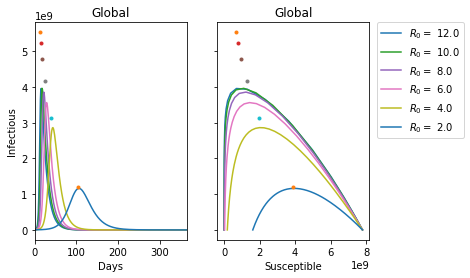

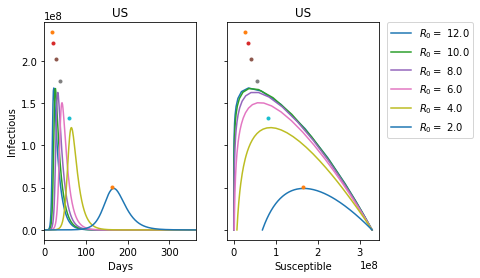

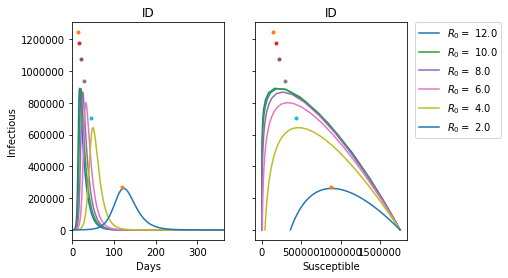

,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
Global,,,,,
no mitigation,12.0,12.9,1.1,12.6,"5,534,969,811.8"
school closure,10.0,12.9,1.3,15.1,"5,224,176,721.6"
social distancing,8.0,12.9,1.6,19.0,"4,797,789,128.1"
shelter in place,6.0,12.9,2.1,25.7,"4,171,044,474.7"
school closure+social distancing,4.0,12.9,3.2,40.5,"3,147,235,532.8"
school closure+shelter in place,2.0,12.9,6.5,103.6,"1,197,785,618.8"
,$R_0$,$T_r$,$\frac{T_r}{R_0}$,$t_{max}$,$I_{max}$
100k,,,,,
no mitigation,12.0,12.9,1.1,12.6,"5,534,969,811.8"


In [6]:
def SIR_peak(s,i,r,Ro,Tr,start,end,title=''):
    #get_ipython().magic('matplotlib inline')
    import numpy as np
    import scipy.integrate as integrate
    import matplotlib.pyplot as plt

    def SIR_tmax(s,i,r,Ro,Tr):
        N=s+i+r
        tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
        return tmax

    def SIR_imax(s,i,r,Ro,Tr):
        N=s+i+r
        imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
        return imax*N

        def s_prime(s):
            return  -beta*i*s
        def i_prime(i):
            return  beta*i*s-gamma*i
        def r_prime(r):
            return  gamma*i

        #def f(x,t):
        #    return -x**3 + np.sin(t)

        a = start        # Start of the interval in days
        b = end      # End of the interval in days
        T = (b-a)     # Number of steps
        h = (b-a)/T        # Size of a single step

        N = s+i+r
        beta = Ro/Tr/N   #COVID-19,14days,100k
        gamma = 1/Tr      #

        #create the array of time values and (empty) x-values, and loop over 
        #all times supplementing x each time
        tpoints = np.arange(a,b,h)
        spoints = []
        ipoints = []
        rpoints = []

        for t in tpoints:
            spoints.append(s)
            ipoints.append(i)
            rpoints.append(r)
            s += h*s_prime(s)
            i += h*i_prime(i)
            r += h*r_prime(r)

        return [tpoints,spoints,ipoints,rpoints] 

    N = s+i+r

    #print(r'$R_0 \beta \gamma$')
    import pandas as pd
    num=6
    Ros = np.arange(Ro,1.,(0.-Ro)/(num))
    #Ros = np.arange(2.3,1.,-1.5/num)
    Trs = np.full(shape=len(Ros),fill_value=Tr)
    tm=[]
    im=[]

    pd.options.display.float_format = '{:,.1f}'.format

    data = []
    #plt.gca().set_prop_cycle(color=['r','r','g','g','b','b','c','c','m','m','y','y','k','k'])
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    #plt.gca().set_prop_cycle(color=['r','g','b','c','m','y','k'])
    for Ro in Ros:
        tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
        im.append(SIR_imax(s,i,r,Ro,Tr))
        [tpoints,spoints,ipoints,rpoints]=SIR(s,i,r,Ro,Tr,start,end)
        data = {
            r'$R_0$':Ros,
            r'$T_r$':Trs,
            r'$\frac{T_r}{R_0}$':Trs/Ros,
            r'$t_{max}$':tm,
            r'$I_{max}$':im,
               }

        #plt.plot(tpoints,spoints, color = 'red' , label='Susceptible')
        #plt.legend(loc='upper right')
        #plt.ylabel("Susceptible")
        #plt.twinx()
        #plt.semilogy(tpoints,ipoints, color = 'green' , label='Infectious')
        #ax1.plot(tpoints,ipoints, label='Infectious')
        ax1.plot(tpoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax1.plot(tm[-1],im[-1],'.')
        ax1.set_xlim(0,365)
        ax1.set_xlabel("Days")
        ax1.set_ylabel(r"Infectious")
        ax1.set_title(title)
        #ax1.set_ylabel(r"Infectious per 100,000")
        #ax1.legend(loc='upper right')
        ax2.plot(spoints,ipoints, label='$R_0=$'+' {:.1f}'.format(Ro))
        ax2.plot(N/Ro,im[-1],'.')
        ax2.set_xlabel("Susceptible")
        ax2.set_title(title)
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        #plt.legend(loc='upper right')
        #plt.plot(tpoints,rpoints, color = 'blue' , label='Recovered')
        #plt.ylabel("Recovered")


    #plt.title("SIR")
    #plt.xlabel("Days")
    #plt.savefig('SIR Model.png', dpi = 300)
    #plt.show()

    #plt.plot(spoints,ipoints, color = 'red' , label='Predator')
    #plt.xlabel("Susceptible")
    #plt.ylabel("Infectious")
    plt.savefig(title+' SIR Imax.png', dpi = 300)
    plt.show()

    df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','shelter in place','school closure+social distancing','school closure+shelter in place'])
    df.index.name=title
    #df = pd.DataFrame(data, index=['no mitigation','school closure','social distancing','lock down'])
    return df

#important part
Ro = 12.
Tr = 12.9
start = 0.
end = 365.

#100k 20200326
i = 2.2e6    # Initial condition
s = 7.8e9-i  # Initial condition
r = 117.e3   # Initial condition
df_world=SIR_peak(s,i,r,Ro,Tr,start,end,title='100k')


#Global 20200326
i = 2.2e6     # Initial condition
s = 7.8e9-i  # Initial condition
r = 117.e3      # Initial condition
df_100k=SIR_peak(s,i,r,Ro,Tr,start,end,title='Global')

#US 20200326
i = 1046     # Initial condition
s = 329227746-i  # Initial condition
r = 619      # Initial condition
df_us=SIR_peak(s,i,r,Ro,Tr,start,end,title='US')

#Idaho 20200326
i = 138
s = 1754208-i
r = 2
df_id=SIR_peak(s,i,r,Ro,Tr,start,end,title='ID')

#pd.dataframe.concat(df_world,df_us,df_id])
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([df_100k,df_world,df_us,df_id])

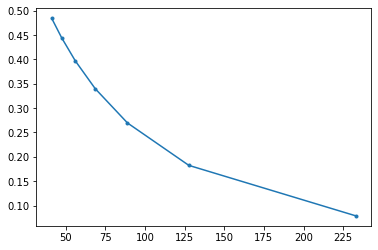

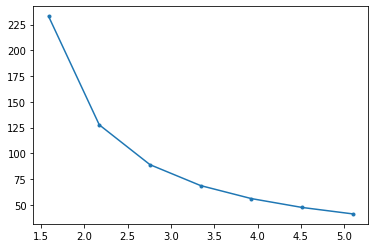

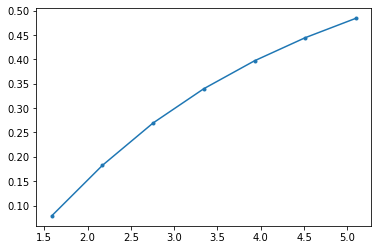

In [10]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

#important part
Ro = 5.1
Tr = 12.9
start = 0.
end = 365.

#s = 1.754e6  # Initial condition
i = 1.     # Initial condition
s = 1.e5-i  # Initial condition
r = 0.0      # Initial condition
N=s+i+r

#print(r'$R_0 \beta \gamma$')
import pandas as pd
num=6
Ros = np.arange(Ro,1.,(1.-Ro)/(num+1))
#Ros = np.arange(2.3,1.,-1.5/(num+1))
Trs = np.full(shape=len(Ros),fill_value=Tr)
#print(Ros)

def SIR_tmax(s,i,r,Ro,Tr):
    N=s+i+r
    tmax=integrate.quad(lambda x: N*Tr/Ro/x/(N-r+N/Ro*(np.log(x))-s*x), N/Ro/s, 1.)
    return tmax

def SIR_imax(s,i,r,Ro,Tr):
    imax=i/N+s/N-(1+np.log(Ro*s/N))/Ro
    return imax

tm=[]
im=[]
for Ro in Ros:
    tm.append(SIR_tmax(s,i,r,Ro,Tr)[0])
    im.append(SIR_imax(s,i,r,Ro,Tr))
    #print(Ro,SIR_tmax(s,i,r,Ro,Tr)[0],SIR_imax(s,i,r,Ro,Tr))

plt.plot(tm,im,'.-')    
plt.show()
plt.plot(Ros,tm,'.-')    
plt.show()
plt.plot(Ros,im,'.-')    
plt.show()